In [68]:
from __future__ import division
import pandas as pd
import numpy as np
from astropy import units as u
from astropy import constants as const
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.io.ascii as asciitable
from astropy.io import ascii


In [69]:
# Define unit conversions
pc=3.09e18
kpc=1e3*pc
msun=1.99e33
myr=3.16e13
g=6.67e-8
msunpc2=msun/pc**2
msunpc2myr=msunpc2/myr

# Choice of CO alpha factor scalings NORMALIZED TO DADDI'S CONVENTIONS
alphasb = 1.0      # starburst value
alphahiz = 1.0     # high-z disk
alphaz0 = 1.0      # z=0 scaling
alphathings = 4.6/4.4 # THINGS data value

# Parameters
sigmagmc=85*msun/pc**2    # GMC surface density in normal galaxies
phip=3.0                  # pressure normalized to isothermal gas disk value
vdisp1=0.8e6                # ISM velocity dispersion in local galaxies
vdisp2=3e6                # ISM velocity dispersion in high-z galaxies and SBs
q=1.0                     # Toomre Q
betasb=1.0                # Index of rotation curve in SBs (solid body)
betadisk=0.0              # Index of rotation curve in normal disks (flat)

# Code not used for plot in Cara's Paper (scroll down to see that code)

In [74]:
#Updated code for retreiving data for Milky Way CMZ 02/22

cmz_clouds_starFormationRate = Table.read('sfr_table.tex').to_pandas()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate['Best SFR Estimate']
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=0, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)
droplist= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate == '-'].tolist()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
#cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)


cmz_clouds_kinematic = Table.read('cmz_cloud_kinematic_properties.tex').to_pandas()
cmz_clouds_kinematic = cmz_clouds_kinematic['HCN mom0']
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=0, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)
#droplist= cmz_clouds_kinematic.index[cmz_clouds_kinematic == '-'].tolist()
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=droplist, axis=0)
#cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=droplist, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)


cmz_clouds_physical = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_physical = cmz_clouds_physical['Area']
cmz_clouds_physical = cmz_clouds_physical.drop(labels=0, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)
cmz_clouds_physical = cmz_clouds_physical.drop(labels=droplist, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)


#turning the data into lists
Ltot = (cmz_clouds_starFormationRate.values.astype(float)).tolist()
#HCN=(cmz_clouds_kinematic.values.astype(float)).tolist()
#area=(cmz_clouds_physical.values.astype(float)).tolist()

#multiplying area and HCN mom0
#areaHCN=[]
#for i in range(len(cmz_clouds_physical)):
#    areaHCN.append(HCN[i]*area[i])


In [71]:
#Original code for retrieving data for Milky Way CMZ

cmz_clouds_kinematic = Table.read('cmz_cloud_kinematic_properties.tex').to_pandas()
cmz_clouds_kinematic = cmz_clouds_kinematic['HCN mom0']
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=0, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)
droplist= cmz_clouds_kinematic.index[cmz_clouds_kinematic == '-'].tolist()
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=droplist, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)


cmz_clouds_SFR = Table.read('sfr_table.tex').to_pandas()
cmz_clouds_SFR = cmz_clouds_SFR['Best SFR Estimate']
cmz_clouds_SFR = cmz_clouds_SFR.drop(labels=0, axis=0)
cmz_clouds_SFR = cmz_clouds_SFR.reset_index(drop=True)
cmz_clouds_SFR = cmz_clouds_SFR.drop(labels=droplist, axis=0)
cmz_clouds_SFR = cmz_clouds_SFR.reset_index(drop=True)

# Some structures do not have valid kinematic measurements.
# We make a list of these structures, and drop them from our catalogue.

cmz_clouds_physical = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_physical = cmz_clouds_physical['Area']
cmz_clouds_physical = cmz_clouds_physical.drop(labels=0, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)
cmz_clouds_physical = cmz_clouds_physical.drop(labels=droplist, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)

#turning the data into lists
Ltot = (cmz_clouds_SFR.values.astype(float)).tolist()
HCN=(cmz_clouds_kinematic.values.astype(float)).tolist()
area=(cmz_clouds_physical.values.astype(float)).tolist()

#multiplying area and HCN mom0
areaHCN=[]
for i in range(len(cmz_clouds_physical)):
    areaHCN.append(HCN[i]*area[i])

KeyError: '[56] not found in axis'

NameError: name 'areaHCN' is not defined

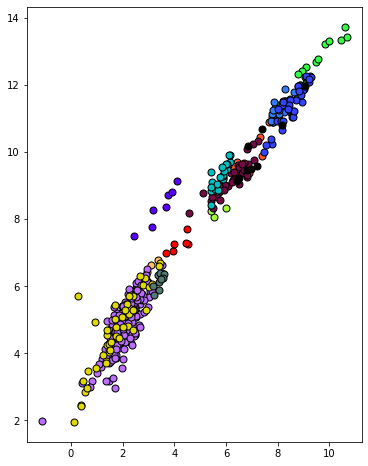

In [ ]:
#Retrieving other data points and plotting

plt.figure(figsize=(6,8))

chen = np.loadtxt('./data/Chen2017.txt')
for i in range(len(chen)):
     x = chen[i][1]
     y = chen[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='r',label='Chen et al. 2017',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='r',markersize='7',markeredgecolor='k')
            
bigiel15= np.loadtxt('./data/bigiel15.txt')
for i in range(len(bigiel15)):
     x = bigiel15[i][1]
     y = bigiel15[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#ff5733',label='Bigiel et al. 2015',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#ff5733',markersize='7',markeredgecolor='k')

buchbender13= np.loadtxt('./data/buchbender13.txt')
for i in range(len(buchbender13)):
     x = buchbender13[i][1]
     y = buchbender13[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#ffbb6e',label='Buchbender et al. 2013',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#ffbb6e',markersize='7',markeredgecolor='k')

garciaC = np.loadtxt('./data/Garcia-Carpio08.txt')
for i in range(len(garciaC)):
     x = garciaC[i][1]
     y = garciaC[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#00901e',label='Garcia-Carpio et al. 2008',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#00901e',markersize='7',markeredgecolor='k')

chin97 = np.loadtxt('./data/chin97.txt')
for i in range(len(chin97)):
     x = chin97[i][1]
     y = chin97[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#1a5f78',label='Chin et al. 1997',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#1a5f78',markersize='7',markeredgecolor='k')

chin98 = np.loadtxt('./data/chin98.txt')
for i in range(len(chin98)):
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#daff33',label='Chin et al. 1998',markersize='7',markeredgecolor='k')

gallagher18 = np.loadtxt('./data/gallagher18.txt')
for i in range(len(gallagher18)):
     x = gallagher18[i][1]
     y = gallagher18[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#a3ff33',label='Gallagher et al. 2018',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#a3ff33',markersize='7',markeredgecolor='k')

gao07 = np.loadtxt('./data/gao07.txt')
for i in range(len(gao07)):
     x = gao07[i][1]
     y = gao07[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#33ff46',label='Gao et al. 2007',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#33ff46',markersize='7',markeredgecolor='k')

garciab = np.loadtxt('./data/garcia-burillo12.txt')
for i in range(len(garciab)):
     x = garciab[i][1]
     y = garciab[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#337aff',label='Garcia-Burillo et al. 2012',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#337aff',markersize='7',markeredgecolor='k')

juneau09 = np.loadtxt('./data/juneau09.txt')
for i in range(len(juneau09)):
     x = juneau09[i][1]
     y = juneau09[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#3343ff',label='Juneau et al. 2009',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#3343ff',markersize='7',markeredgecolor='k')

stephens16 = np.loadtxt('./data/stephens16.txt')
for i in range(len(stephens16)):
     x = stephens16[i][1]
     y = stephens16[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#bb6Eff',label='Stephens et al. 2016',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#bb6Eff',markersize='7',markeredgecolor='k')
     
usero15 = np.loadtxt('./data/usero15.txt')
for i in range(len(usero15)):
     x = usero15[i][1]
     y = usero15[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#740c44',label='Usero et al. 2015',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#740c44',markersize='7',markeredgecolor='k')

wu = np.loadtxt('./data/Wu2010.txt')
for i in range(len(wu)):
     x = wu[i][1]
     y = wu[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#e1da00',label='Wu et al.2010',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#e1da00',markersize='7',markeredgecolor='k')


kepley = np.loadtxt('./data/Kepley14.txt')
for i in range(len(kepley)):
     x = kepley[i][1]
     y = kepley[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='c',label='Kepley et al.2014',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='c',markersize='7',markeredgecolor='k')

braine= np.loadtxt('./data/braine16.txt')
for i in range(len(braine)):
     x = braine[i][1]
     y = braine[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#5a00ff',label='Braine et al.2016',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#5a00ff',markersize='7',markeredgecolor='k')
krips= np.loadtxt('./data/krips08.txt')
for i in range(len(krips)):
     x = krips[i][1]
     y = krips[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='k',label='Krips et al.2008',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='k',markersize='7',markeredgecolor='k')

bro= np.loadtxt('./data/brouillet05(weird).txt')
for i in range(len(bro)):
     x = bro[i][1]
     y = bro[i][0]
     if i==0:
          plt.plot(x,y,ls='',marker='o',color='#547b73',label='Brouille et al.2005',markersize='7',markeredgecolor='k')
     else:
          plt.plot(x,y,ls='',marker='o',color='#547b73',markersize='7',markeredgecolor='k')

plt.plot(np.log10(areaHCN),np.log10(Ltot),ls='', marker='o', color='#ff00f8', label='CMZ clouds', markersize='7',markeredgecolor="k")
plt.ylabel('log $L_{total} (L_{\odot}) \propto$ Star Formation Rate', **{'fontname':'Georgia'}, fontsize=15)
plt.xlabel('log HCN*Area (K km s$^{-1}$ pc$^{2}) \propto$ Dense Gas',**{'fontname':'Georgia'},fontsize=15)
mpl.rc('font', family='Georgia')
plt.legend(loc='lower right', numpoints=1, ncol=1, fontsize=10, labelspacing=.16)

plt.ylim(0, 14)
plt.xlim(-1.5, 11)

mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 



# Code for Figure 12 in Cara's paper

In [141]:
# Star Formation Rate vs Gas
cmz_clouds_starFormationRate = Table.read('sfr_table.tex').to_pandas()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate['Best SFR Estimate']
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=0, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)
droplist= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate == '-'].tolist()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
#cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)


cmz_clouds_physical = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_physical = cmz_clouds_physical['Area']
cmz_clouds_physical = cmz_clouds_physical.drop(labels=0, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)
cmz_clouds_physical = cmz_clouds_physical.drop(labels=droplist, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)


#turning the data into lists

cmz_clouds_mass = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_mass = cmz_clouds_mass['Mass']
cmz_clouds_mass = cmz_clouds_mass.drop(labels=0, axis=0)
cmz_clouds_mass = cmz_clouds_mass.reset_index(drop=True)
cmz_clouds_mass = cmz_clouds_mass.drop(labels=droplist, axis=0)
cmz_clouds_mass = cmz_clouds_mass.reset_index(drop=True)

SFR= (cmz_clouds_starFormationRate.values.astype(float)).tolist()
mass=(cmz_clouds_mass.values.astype(float)).tolist()
area=(cmz_clouds_physical.values.astype(float)).tolist()

SFR_list=[]
gas=[]

for i in range(len(cmz_clouds_starFormationRate)):
    SFR_list.append(SFR[i]/(area[i]/1000000))
for i in range(len(cmz_clouds_starFormationRate)):
    gas.append(mass[i]/area[i])

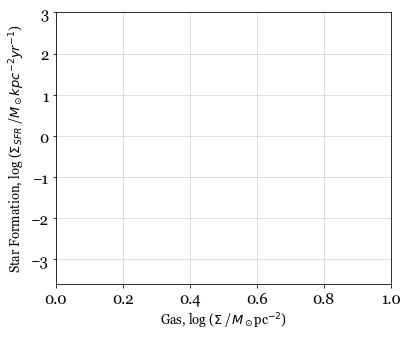

In [142]:
#creating plot
fig=plt.figure(figsize=(6,5))
ax=fig.add_subplot(111)
ax.grid(alpha=0.5)

plt.ylabel('Star Formation, log ($\Sigma_{SFR}$ /$M_\odot$$kpc^{-2}yr^{-1}$)', **{'fontname':'Georgia'}, fontsize=13)
plt.xlabel('Gas, log ($\Sigma$ /$M_\odot$pc$^{-2}$)',**{'fontname':'Georgia'},fontsize=13)
mpl.rc('font', family='Georgia')
plt.ylim(-3.6,3)



mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 

In [143]:
#later used for plotting

sigmag_heid=[]        # Gas surface density
sigmasfr_heid=[]      # SFR surface density

fp=open('./data/heiderman.txt', 'r')
for line in fp:
    spl=line.split()
    sigmag_heid.append(float(spl[14]))
    sigmasfr_heid.append(float(spl[20]))

fp.close()
sigmag_heid = np.array(sigmag_heid)*msun/pc**2
sigmasfr_heid = np.array(sigmasfr_heid)*msun/pc**2/myr

sigmag_heid = np.log10(sigmag_heid/msunpc2)
sigmasfr_heid = np.log10(sigmasfr_heid/msunpc2myr)
sigmag_heid,sigmasfr_heid

(array([1.80821097, 1.76267856, 1.77232171, 1.87506126, 2.0211893 ,
        1.95424251, 2.13987909, 1.96801571, 1.96567197, 1.83695674,
        1.67669361, 1.95951838, 1.96425963, 1.73957234, 1.77158748,
        1.82930377, 1.78031731, 1.69108149, 1.93043959, 2.13353891]),
 array([-0.21824463, -0.43533394,  0.04139269,  0.07554696,  0.38916608,
         0.1172713 ,  0.5171959 , -0.68402965, -0.06854213, -0.11013828,
        -1.44733178,  0.372912  ,  0.5276299 , -0.4225082 , -0.96657624,
         0.22010809, -0.03857891, -0.35654732, -0.46470588,  0.30319606]))

In [144]:
"""literature properties - Lada"""

# Lada data; masses for A_K = 0.1 and 0.8 contours
mass_lada1=np.array([67714., 71828., 99930., 18438., 14964., 14165., 1137., 7937., 2157., 1379., 787.])*msun
mass_lada2=np.array([13721., 7261., 3199., 1880., 1766., 1296., 258., 178., 163., 124., 75.])*msun
sfr_lada=np.array([715., 159., 70., 150., 84., 79., 25., 5., 17., 3., 3.])*msun/myr

sigmag_lada2=116.*2.*msun/pc**2
sigmag_lada1=np.array([sigmag_lada2/8.0]*len(mass_lada2))
area_lada1=mass_lada1/sigmag_lada1
area_lada2=mass_lada2/sigmag_lada2
sigmasfr_lada1=sfr_lada/area_lada1
sigmasfr_lada2=sfr_lada/area_lada2/3.0

sigmag_lada = np.log10(sigmag_lada1/msunpc2)
sigmasfr_lada = np.log10(sigmasfr_lada1/msunpc2myr)

In [145]:
"""literature properties - Genzel"""

sigmag_genzel=[]
sigmasfr_genzel=[]
sigmagtdyn_genzel=[]
sb_genzel=[]
fp=open('./data/genzel_ks.dat', 'r')

for line in fp:
    if line[0]=='#':
        continue
    spl=line.split()
    if spl[0]=='Name':
        continue
    sigmag_genzel.append(10.0**float(spl[11])*msun/pc**2)
    sigmagtdyn_genzel.append(10.0**float(spl[12])/(2.0*np.pi)*msun/pc**2/myr)
    sigmasfr_genzel.append(10.0**float(spl[13])*msun/pc**2/myr)
    # Apply CO scalings
    if spl[0][0:3]=='SMM':
        # sub-mm galaxy, so use starburst scalings; Genzel uses alpha = 1.0
        # for starbursts, and Daddi's convention is 0.8
        sb_genzel.append(True)
        sigmag_genzel[-1] = sigmag_genzel[-1]*0.8/1.0*alphasb
        sigmagtdyn_genzel[-1] = sigmagtdyn_genzel[-1]*0.8/1.0*alphasb
    else:
        # non-sub-mm galaxy, so use normal high z scalings; Genzel uses
        # alpha = 3.2, Daddi uses 3.6
        sb_genzel.append(False)
        sigmag_genzel[-1] = sigmag_genzel[-1]*3.6/3.2*alphahiz
        sigmagtdyn_genzel[-1] = sigmagtdyn_genzel[-1]*3.6/3.2*alphahiz
fp.close()

sigmag_genzel = np.array(sigmag_genzel)
sigmasfr_genzel = np.array(sigmasfr_genzel)

sigmag_genzel = np.log10(sigmag_genzel/msunpc2)
sigmasfr_genzel = np.log10(sigmasfr_genzel/msunpc2myr)

In [146]:
"""literature properties - Bouche"""

sigmag_bouche=[]
sigmasfr_bouche=[]
sigmagtdyn_bouche=[]
fp=open('./data/KS_2_Bouche.dat', 'r')
for line in fp:
    if line[0]=='#':
        continue
    spl=line.split()
    sigmag_bouche.append(10.0**float(spl[0])*msun/pc**2*alphasb)
    sigmagtdyn_bouche.append(10.0**float(spl[2])/(2.0*np.pi)*msun/pc**2/myr * 
                             alphasb)
    sigmasfr_bouche.append(10.0**float(spl[1])*msun/pc**2/myr)
fp.close()

sigmag_bouche = np.array(sigmag_bouche)
sigmasfr_bouche = np.array(sigmasfr_bouche)

sigmag_bouche = np.log10(sigmag_bouche/msunpc2)
sigmasfr_bouche = np.log10(sigmasfr_bouche/msunpc2myr)

In [147]:
"""literature properties - Daddi z = 0.5"""

sigmag_daddiz05=[]
sigmasfr_daddiz05=[]
sigmagtdyn_daddiz05=[]

fp=open('./data/KS_2_Daddiz05.dat', 'r')
for line in fp:
    if line[0]=='#':
        continue
    if line[0]=='\n':
        continue
    spl=line.split()
    sigmag_daddiz05.append(10.0**float(spl[1])*msun/pc**2*alphahiz)
    sigmagtdyn_daddiz05.append(10.0**float(spl[2])*msun/pc**2/myr * 
                               alphahiz)
    sigmasfr_daddiz05.append(10.0**float(spl[0])*msun/pc**2/myr)
fp.close()

sigmag_daddiz05 = np.array(sigmag_daddiz05)
sigmasfr_daddiz05 = np.array(sigmasfr_daddiz05)

sigmag_daddiz05 = np.log10(sigmag_daddiz05/msunpc2)
sigmasfr_daddiz05 = np.log10(sigmasfr_daddiz05/msunpc2myr)

In [148]:
"""literature properties - Daddi z = 2"""

sigmag_daddiz2=[]
sigmasfr_daddiz2=[]
sigmagtdyn_daddiz2=[]

fp=open('./data/KS_2_Daddi.dat', 'r')
for line in fp:
    if line[0]=='#':
        continue
    if line[0]=='\n':
        continue
    spl=line.split()
    sigmag_daddiz2.append(float(spl[0])*msun/pc**2*alphahiz)
    sigmagtdyn_daddiz2.append(float(spl[2])*msun/pc**2/myr *alphahiz)
    sigmasfr_daddiz2.append(float(spl[1])*msun/pc**2/myr)
fp.close()

sigmag_daddiz2 = np.array(sigmag_daddiz2)
sigmasfr_daddiz2 = np.array(sigmasfr_daddiz2)

sigmag_daddiz2 = np.log10(sigmag_daddiz2/msunpc2)
sigmasfr_daddiz2 = np.log10(sigmasfr_daddiz2/msunpc2myr)

In [149]:
"""literature properties - Tacconi"""

sigmag_tacconi=[]
sigmasfr_tacconi=[]
sigmagtdyn_tacconi=[]

fp=open('./data/Tacconi_KS.dat', 'r')
for line in fp:
    if line[0]=='#':
        continue
    if line[0]=='\n':
        continue
    spl=line.split()
    sigmag_tacconi.append(10.0**float(spl[1])*msun/pc**2*alphahiz)
    sigmagtdyn_tacconi.append(10.0**float(spl[2])*msun/pc**2/myr * 
                              alphahiz)
    sigmasfr_tacconi.append(10.0**float(spl[0])*msun/pc**2/myr)
fp.close()

sigmag_tacconi = np.array(sigmag_tacconi)
sigmasfr_tacconi = np.array(sigmasfr_tacconi)

sigmag_tacconi = np.log10(sigmag_tacconi/msunpc2)
sigmasfr_tacconi = np.log10(sigmasfr_tacconi/msunpc2myr)

In [150]:
"""literature properties - Tacconi 2012"""

name_tacconi12=[]
sigmag_tacconi12=[]
sigmasfr_tacconi12=[]
tdyn_tacconi12=[]
sb_tacconi12=[]

fp=open('./data/tacconi12.txt', 'r')
fp.readline()
fp.readline()
for line in fp:
    spl=line.split()
    if spl[2]=='...':
        continue
    name_tacconi12.append(spl[0])
    sigmag_tacconi12.append(10.**float(spl[-2])*msunpc2)
    sigmasfr_tacconi12.append(10.**float(spl[-1])*msunpc2myr)
    tdyn_tacconi12.append(2*np.pi*float(spl[3])*kpc/(float(spl[2])*1e5))
    sb_tacconi12.append('merger' in spl[1].lower() or 'amor' in spl[1].lower())
fp.close()

sigmag_tacconi12 = np.array(sigmag_tacconi12)
sigmasfr_tacconi12 = np.array(sigmasfr_tacconi12)

sigmag_tacconi12 = np.log10(sigmag_tacconi12/msunpc2)
sigmasfr_tacconi12 = np.log10(sigmasfr_tacconi12/msunpc2myr)

In [151]:
"""literature properties - Kennicutt ULIRG"""

sigmag_kenn_ulirg=[]
sigmasfr_kenn_ulirg=[]
tdyn_kenn_ulirg=[]

fp=open('./data/KS_2_KennUlirgs.dat', 'r')
for line in fp:
    if line[0]=='#':
        continue
    if line[0]=='\n':
        continue
    spl=line.split()
    if spl[2]=='-1':
        continue
    sigmag_kenn_ulirg.append(10.0**float(spl[0])*msun/pc**2*alphasb)
    sigmasfr_kenn_ulirg.append(10.0**float(spl[1])*msun/pc**2/myr)
    tdyn_kenn_ulirg.append(float(spl[2])*100*myr)
fp.close()

sigmag_kenn_ulirg = np.array(sigmag_kenn_ulirg)
sigmasfr_kenn_ulirg = np.array(sigmasfr_kenn_ulirg)

sigmag_kenn_ulirg = np.log10(sigmag_kenn_ulirg/msunpc2)
sigmasfr_kenn_ulirg = np.log10(sigmasfr_kenn_ulirg/msunpc2myr)

In [152]:
"""literature properties - Kennicutt spiral"""

sigmag_kenn_spiral=[]
sigmasfr_kenn_spiral=[]
tdyn_kenn_spiral=[]

fp=open('./data/KS_2_KennSpirals.dat', 'r')
for line in fp:
    if line[0]=='#':
        continue
    if line[0]=='\n':
        continue
    spl=line.split()
    if spl[2]=='-1':
        continue
    sigmag_kenn_spiral.append(10.0**float(spl[0])*msun/pc**2*alphasb)
    sigmasfr_kenn_spiral.append(10.0**float(spl[1])*msun/pc**2/myr)
    tdyn_kenn_spiral.append(float(spl[2])*100*myr)
fp.close()

sigmag_kenn_spiral = np.array(sigmag_kenn_spiral)
sigmasfr_kenn_spiral = np.array(sigmasfr_kenn_spiral)

sigmag_kenn_spiral = np.log10(sigmag_kenn_spiral/msunpc2)
sigmasfr_kenn_spiral = np.log10(sigmasfr_kenn_spiral/msunpc2myr)

In [153]:
"""literature properties - Davis 2014"""

data_davis14=ascii.read('./data/DAVIS14_WISEsfrs.txt')

sigmag_davis14 = np.array(data_davis14['Sig_gas'])*msunpc2
sigmasfr_davis14 = np.array(data_davis14['SFR'])*msunpc2myr

sigmag_davis14 = np.log10(sigmag_davis14/msunpc2)
sigmasfr_davis14 = np.log10(sigmasfr_davis14/msunpc2myr)

In [154]:
"""literature properties - Evans 2013"""

evansdat=ascii.read('./data/logsdens.dat')
evansdat1=ascii.read('./data/logsdens1.dat')
evansdat2=ascii.read('./data/logsdensu.dat')

logsigmagtff_evans=evansdat['col1']
logsigmasfr_evans=evansdat['col4']

logsigmagtff_evans1=evansdat1['col1']
logsigmasfr_evans1=evansdat1['col4']
logsigmasfrerr_evans1=evansdat1['col6']

logsigmagtff_evans2=evansdat2['col1']
logsigmasfr_evans2=evansdat2['col4']
logsigmasfrerr_evans2=evansdat2['col6']

In [155]:
"""literature properties - Lada 2013 / Lombardi data"""

ladadat=ascii.read('./data/lombardi3.dat')
arealada=ladadat['AREA'].data*pc**2
sigmaSFRlada=ladadat['NSTARS'].data*0.25*msun/(0.25*myr)/arealada
sigmaSFRerrlada=np.sqrt(ladadat['NSTARS'].data)*0.25*msun/(0.25*myr)/arealada
AKtosigmag = 183*msun/pc**2
sigmaglada=ladadat['AK_MEAN']*AKtosigmag
masslada=sigmaglada*arealada
areadifflada=arealada[:-1]-arealada[1:]
massdifflada=masslada[:-1]-masslada[1:]
sigmaSFRdifflada=(ladadat['NSTARS'].data[:-1] - ladadat['NSTARS'].data[1:]) *0.25*msun/(0.25*myr) / areadifflada
sigmaSFRdifferrlada=np.sqrt(ladadat['NSTARS'].data[:-1] - ladadat['NSTARS'].data[1:]) *0.25*msun/(0.25*myr) / areadifflada
sigmagdifflada=massdifflada/areadifflada

sigmag_lada13 = np.log10(sigmagdifflada/msunpc2)
sigmasfr_lada13 = np.log10(sigmaSFRdifflada/msunpc2myr)

/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_33647/1578730040.py:17: RuntimeWarning: divide by zero encountered in log10
  sigmasfr_lada13 = np.log10(sigmaSFRdifflada/msunpc2myr)


In [156]:
"""literature properties - Gutermuth 2011"""

gutermuthdata=ascii.read('./data/gutermuth11.txt')
area_gutermuth11=gutermuthdata['Area[pc^2]']*pc**2
mass_gutermuth11=gutermuthdata['Mass[msol]']*msun
sigmag_gutermuth11=mass_gutermuth11/area_gutermuth11
nstar_gutermuth11=gutermuthdata['N_II']
sigmasfr_gutermuth11=nstar_gutermuth11*0.5*msun/(2.0*myr)/area_gutermuth11

sigmag_gutermuth11 = np.log10(sigmag_gutermuth11/msunpc2)
sigmasfr_gutermuth11 = np.log10(sigmasfr_gutermuth11/msunpc2myr)

In [157]:
"""literature properties - Wu 2010"""

wudata=ascii.read('./data/wu10.txt')
area_wu10=wudata['Area']*pc**2
sigmag_wu10=10.**wudata['logSig_gas']*msunpc2
sigmasfr_wu10=10.**wudata['logSig_SFR']*msunpc2myr

sigmag_wu10 = np.log10(sigmag_wu10/msunpc2)
sigmasfr_wu10 = np.log10(sigmasfr_wu10/msunpc2myr)

In [158]:
"""literature properties - Bigiel 2008"""

table_B08in = asciitable.read('./data/bigiel08_in.txt', Reader=asciitable.Cds)
table_B08out = asciitable.read('./data/bigiel08_out.txt', Reader=asciitable.Cds)

table_B08in['logGAS'] = np.log10(10**table_B08in['logHI'].quantity.value + 10**table_B08in['logH2'].quantity.value) *table_B08in['logH2'].unit
table_B08out['logSFR'] = np.log10(table_B08out['SFR'].quantity.value *1e-5) *table_B08in['logSFR'].unit

sigmag_bigiel = table_B08in['logGAS']
sigmasfr_bigiel = table_B08in['logSFR']

/var/folders/8n/_rhj_p6j11j3hj9wn3tzy0280000gn/T/ipykernel_33647/4067179639.py:7: RuntimeWarning: divide by zero encountered in log10
  table_B08out['logSFR'] = np.log10(table_B08out['SFR'].quantity.value *1e-5) *table_B08in['logSFR'].unit


In [159]:
#creating the "density" effect on graph 

sigmag_all = np.array(np.hstack([sigmag_bigiel, sigmag_heid, sigmag_lada, 
                        sigmag_genzel, sigmag_bouche, sigmag_daddiz05,
                        sigmag_daddiz2, sigmag_tacconi, sigmag_kenn_ulirg,
                        sigmag_kenn_spiral, sigmag_davis14, sigmag_lada13, 
                        sigmag_gutermuth11, sigmag_wu10]))

sigmasfr_all = np.array(np.hstack([sigmasfr_bigiel, sigmasfr_heid, sigmasfr_lada, 
                        sigmasfr_genzel, sigmasfr_bouche, sigmasfr_daddiz05,
                        sigmasfr_daddiz2, sigmasfr_tacconi, sigmasfr_kenn_ulirg,
                        sigmasfr_kenn_spiral, sigmasfr_davis14, sigmasfr_lada13, 
                        sigmasfr_gutermuth11, sigmasfr_wu10]))

sigmag_all = sigmag_all[~np.isinf(sigmasfr_all)]
sigmasfr_all = sigmasfr_all[~np.isinf(sigmasfr_all)]
sigmag_all = sigmag_all[sigmasfr_all!=0]
sigmasfr_all = sigmasfr_all[sigmasfr_all!=0]

x, y = sigmag_all, sigmasfr_all

ax.scatter(x, y, ec='none', fc='black', s=43)
ax.scatter(x, y, ec='none', fc='white', s=30)


#creating the "density" effect on graph for Milky Way CMZ
gas = np.array(np.hstack([np.log10(gas)]))
SFR_list = np.array(np.hstack([np.log10(SFR_list)]))

ax.scatter(gas, SFR_list, ec='none', fc='black', s=43)
ax.scatter(gas, SFR_list, ec='none', fc='white', s=30)



In [160]:
#plotting points


l_B08 = ax.scatter(sigmag_bigiel, sigmasfr_bigiel, s=30, ec='none', alpha=0.4, c='orange', label="Disc Galaxies")
l_kenn_spiral = ax.scatter(sigmag_kenn_spiral, sigmasfr_kenn_spiral,alpha=0.4, s=30, ec='none', c='orange')
l_davis14 = ax.scatter(sigmag_davis14, sigmasfr_davis14, s=30, ec='none', alpha=0.4, c='orange')

l_kenn_ulirg = ax.scatter(sigmag_kenn_ulirg, sigmasfr_kenn_ulirg, s=30, alpha=0.4,ec='none',  c='blue',label="Starburst Galaxies")

l_genzel = ax.scatter(sigmag_genzel, sigmasfr_genzel, s=30, ec='none', alpha=0.4,c='#bb6Eff', label= "High-redshift Galaxies")
l_bouche = ax.scatter(sigmag_bouche, sigmasfr_bouche, s=30, ec='none', alpha=0.4,c='#bb6Eff')
l_daddiz05 = ax.scatter(sigmag_daddiz05, sigmasfr_daddiz05, s=30, ec='none',alpha=0.4,  c='#bb6Eff')
l_daddiz2 = ax.scatter(sigmag_daddiz2, sigmasfr_daddiz2, s=30, ec='none',alpha=0.4,c='#bb6Eff')
l_tacconi = ax.scatter(sigmag_tacconi, sigmasfr_tacconi, s=30, ec='none', alpha=0.4,c='#bb6Eff')

l_heid = ax.scatter(sigmag_heid, sigmasfr_heid, s=30, ec='none', c='red', alpha=0.4,label= "Milky Way Clouds")
l_lada = ax.scatter(sigmag_lada, sigmasfr_lada, s=30, ec='none',  alpha=0.4,c='red')
l_lada13 = ax.scatter(sigmag_lada13, sigmasfr_lada13, s=30, ec='none',alpha=0.4, c='red')
l_gutermuth11 = ax.scatter(sigmag_gutermuth11, sigmasfr_gutermuth11, s=30,alpha=0.4, ec='none', c='red')
l_wu10 = ax.scatter(sigmag_wu10, sigmasfr_wu10, s=30, ec='none', alpha=0.4,c='red')

ax.scatter(gas,SFR_list, c='c', ec='none', s=30, alpha=0.4, label="Milky Way CMZ")

In [161]:
#used for error bar

"""Geometry"""

def get_areadisc(R):
    """Surface area (A) of ring with outer radius R"""
    A = np.pi*(R**2)
    return(A)

def get_areaannulus(R, deltaR):
    """Surface area (A) of annulus with outer radius R and width deltaR"""
    A = np.pi*(R**2 - (R-deltaR)**2)
    return(A)

def get_arearectangle(L, H):
    """Surface area (A) of rectangle with length L and height H"""
    A = L*H
    return(A)

def get_surfacedensity(A, p, log=True):
    """Surface area of annulus with outer radius R and width deltaR
    log=True returns log10 units"""
    Sigma = p/A
    if log: 
        Sigma=np.log10(Sigma)
    return(Sigma)

In [162]:
#used for error bar

"""CMZ properties"""

area_flat = get_arearectangle(200, 20)
area = get_areadisc(100) #ring

sfr_CMZ = 0.012
gas_CMZ = 1.8e7

Sigmagas_CMZring_L = get_surfacedensity(area, gas_CMZ)
Sigmasfr_CMZring_L = get_surfacedensity(area, sfr_CMZ)+6 

sfr_CMZ = 0.14
gas_CMZ = 5.3e7

Sigmagas_CMZring_H = get_surfacedensity(area, gas_CMZ)
Sigmasfr_CMZring_H = get_surfacedensity(area, sfr_CMZ)+6

sfr_CMZ = 0.07
gas_CMZ = 3.55e7

Sigmagas_CMZring = get_surfacedensity(area, gas_CMZ)
Sigmasfr_CMZring = get_surfacedensity(area, sfr_CMZ)+6

In [163]:
"""CMZ properties"""

x = Sigmagas_CMZring
y = Sigmasfr_CMZring

xerr = np.array([[(x-Sigmagas_CMZring_L)], [(Sigmagas_CMZring_H-x)]])
yerr = np.array([[(y-Sigmasfr_CMZring_L)], [(Sigmasfr_CMZring_H-y)]])
print(xerr)
print(yerr)

ax.errorbar([x],[y],xerr=xerr,yerr=yerr,
            zorder=11, c='black', 
            capsize=3, 
            elinewidth=2,
            capthick=2)

ax.scatter(x,y, fc='c', ec='black', lw=2, zorder=11)

factor = np.log10((100**2-90**2)/(100**2))

ax.scatter(x-factor,y-factor, fc='c', ec='black', lw=2, zorder=11, s=30, alpha=1, marker='^')


factor = np.log10((200*20)/(np.pi*(100**2)))

ax.scatter(x-factor,y-factor, fc='c', ec='black', lw=2, zorder=11, s=30, alpha=1, marker='s')
ax.plot([x,x-factor], [y,y-factor], c='black', lw=2, ls='--', zorder=2, alpha=1)

[[0.29495585]
 [0.17404752]]
[[0.76591679]
 [0.30103   ]]


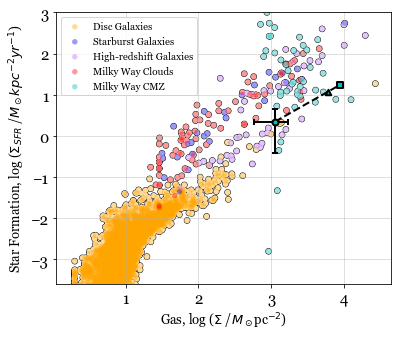

In [164]:
ax.legend(loc='upper left',fontsize=10)
fig


In [165]:
fig.savefig('SFRvsGas.pdf')